# Final Project: Online Shoppers Purchasing Intention Dataset

# Introduction:

Online shopping has changed how we buy things, making it more convenient to shop from the comfort of our homes. But for businesses, understanding what makes people buy things online is crucial. This study looks at a dataset of online shopping behavior to figure out why people buy things online and how businesses can use this information to sell more effectively.

# Data:

The dataset has information from 12,330 shopping sessions, each representing one person's visit to an online store over a year. It includes details like which pages they visited, how long they stayed on those pages, and metrics like bounce rates and page values, which help measure how likely someone is to buy something.

Dataset Name : Online Shoppers Purchasing Intention Dataset

Dataset link : https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset

Author Name : C. Sakar, Yomi Kastro

# Data Collection:
This data comes from the UCI Machine Learning Repository, and it's been carefully put together to make sure it's not biased towards any specific advertising campaigns or special events. This way, we can get a true picture of how people shop online.

# Cases:
There are over 10,000 instances where people didn't end up buying anything and about 2,000 instances where they did. Each instance tells a story about someone's online shopping experience, giving us insight into what influences their decisions.

# Variables:
The dataset has lots of different pieces of information, like how many different types of pages someone visited, how long they spent on those pages, and metrics like bounce rate (which shows how many people left the site without doing anything) and page value (which shows how much a page is worth in terms of sales). It also includes things like whether it was a special day, what operating system they were using, and whether they were a new or returning visitor.

Administrative : Number of different types of administrative pages visited during the session.
Administrative_Duration	:Total time spent on administrative pages during the session.
Informational	: Number of different types of informational pages visited during the session.
Informational_Duration :	Total time spent on informational pages during the session.
ProductRelated	: Number of different types of product-related pages visited during the session.
ProductRelated_Duration :	Total time spent on product-related pages during the session.
BounceRates :	Bounce rate: percentage of visitors who enter and leave from a page without further interaction.
ExitRates :	Exit rate: percentage of pageviews that were the last in the session.
PageValues	: Average value of a page visited before completing an e-commerce transaction.
SpecialDay	: Closeness to a special day, influencing the likelihood of transactions.
Month :	Month of the year when the session occurred.
OperatingSystems :	Operating system used by the visitor.
Browser	: Browser used by the visitor.
Region: 	Region of the visitor.
TrafficType:	Type of traffic that led the visitor to the site.
VisitorType:	Whether the visitor is a returning or new visitor.
Weekend:	Whether the visit occurred on a weekend.
Revenue:	Whether the session resulted in revenue.


#Problem Identification:
We want to figure out different types of online shoppers by looking at how they browse our website. This will help us customize our marketing efforts and make our website better for each group. We need to use data about what pages they visit, like Administrative and ProductRelated pages, to group them into categories. Then, we can come up with strategies to attract each type of shopper and make their experience more personalized.

#Project Objective
The project aims to categorize online shoppers into distinct groups based on their browsing behavior, enabling targeted marketing strategies and website enhancements. By understanding the preferences and characteristics of each shopper segment, the goal is to personalize the online shopping experience and improve customer satisfaction. Ultimately, the project seeks to optimize marketing efforts, increase engagement, and foster long-term loyalty among diverse customer segments.




# Analysis

# Imported Libraries

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC

In [39]:
Online_Shoppers_data = pd.read_csv("/content/online_shoppers_intention.csv")
Online_Shoppers_data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


From the above output we can see there are 12330 rows and 18 columns

#Data Quality

In [40]:
Online_Shoppers_data.head().T

,0,1,2,3,4
Administrative,0,0,0,0,0
Administrative_Duration,0.0,0.0,0.0,0.0,0.0
Informational,0,0,0,0,0
Informational_Duration,0.0,0.0,0.0,0.0,0.0
ProductRelated,1,2,1,2,10
ProductRelated_Duration,0.0,64.0,0.0,2.666667,627.5
BounceRates,0.2,0.0,0.2,0.05,0.02
ExitRates,0.2,0.1,0.2,0.14,0.05
PageValues,0.0,0.0,0.0,0.0,0.0
SpecialDay,0.0,0.0,0.0,0.0,0.0


In [41]:
Online_Shoppers_data.shape

(12330, 18)

The online shoppers data has 12330 columns and 18 rows

In [42]:
Online_Shoppers_data.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

From the above dataset we have different types of data such as integer, float boolean and object. But we have to treat them as categorical variables.

Need to convert object into categorical variable

In [43]:
Online_Shoppers_data["VisitorType"] = Online_Shoppers_data["VisitorType"].astype("category")
Online_Shoppers_data["Month"] = Online_Shoppers_data ["Month"].astype("category")
Online_Shoppers_data.dtypes

Administrative                int64
Administrative_Duration     float64
Informational                 int64
Informational_Duration      float64
ProductRelated                int64
ProductRelated_Duration     float64
BounceRates                 float64
ExitRates                   float64
PageValues                  float64
SpecialDay                  float64
Month                      category
OperatingSystems              int64
Browser                       int64
Region                        int64
TrafficType                   int64
VisitorType                category
Weekend                        bool
Revenue                        bool
dtype: object

The Month and VistorType data have been converted into categorical variables

#Need to check for Missing Values in dataset

In [44]:
Online_Shoppers_data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

The dataset has no missing values.

# Need to Identify duplicate records in the dataset


In [9]:
DuplicatesCheck = Online_Shoppers_data.duplicated().sum()
print(f"Duplicate rows found: {DuplicatesCheck}")

Duplicate rows found: 125


In [10]:
DuplicatesCheck = (Online_Shoppers_data.duplicated().sum())
print(Online_Shoppers_data.duplicated())

0        False
1        False
2        False
3        False
4        False
         ...  
12325    False
12326    False
12327    False
12328    False
12329    False
Length: 12330, dtype: bool


None of the values are duplicates.

# Duplicate items must be removed in order to clean the dataset.


In [11]:
CleanData = Online_Shoppers_data.drop_duplicates()
CleanData

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


# clearing the dataset of any duplicate entries

In [12]:
CleanData = Online_Shoppers_data.drop_duplicates()

#presenting the cleared data

In [13]:
print(CleanData)


       Administrative  Administrative_Duration  Informational  \
0                   0                      0.0              0   
1                   0                      0.0              0   
2                   0                      0.0              0   
3                   0                      0.0              0   
4                   0                      0.0              0   
...               ...                      ...            ...   
12325               3                    145.0              0   
12326               0                      0.0              0   
12327               0                      0.0              0   
12328               4                     75.0              0   
12329               0                      0.0              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                         0.0               1                 0.000000   
1                         0.0               2                64.000000 

From the above output we can see there are 12205 rows and 18 columns

# To check the quality of the data, remove any rows that have missing values.

In [14]:
FinalData = CleanData.dropna()
FinalData

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


There are 12205 rows and 18 columns

# calculating the summary statistics

In [15]:
Online_Shoppers_data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


#Bar plots grouping by Month and Visitor Type

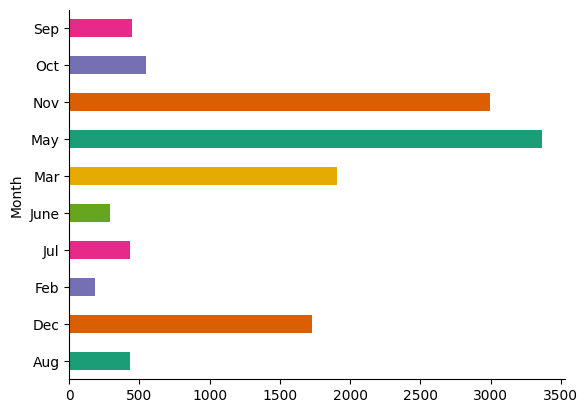

In [16]:
Online_Shoppers_data.groupby('Month').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

November is the month with the biggest number of internet shoppers, followed by May.

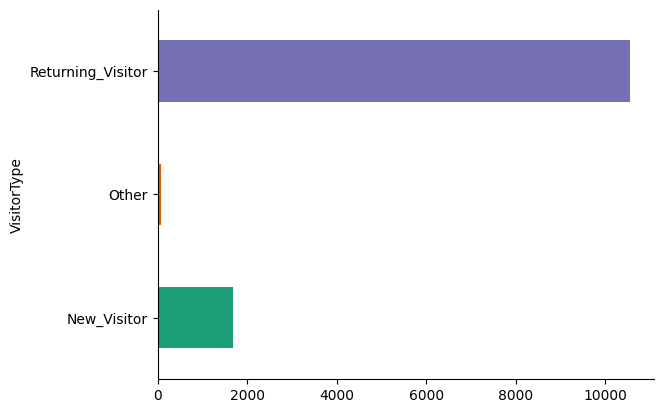

In [17]:
Online_Shoppers_data.groupby('VisitorType').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Recurring visitors make up over 80% of the total number of visitors.

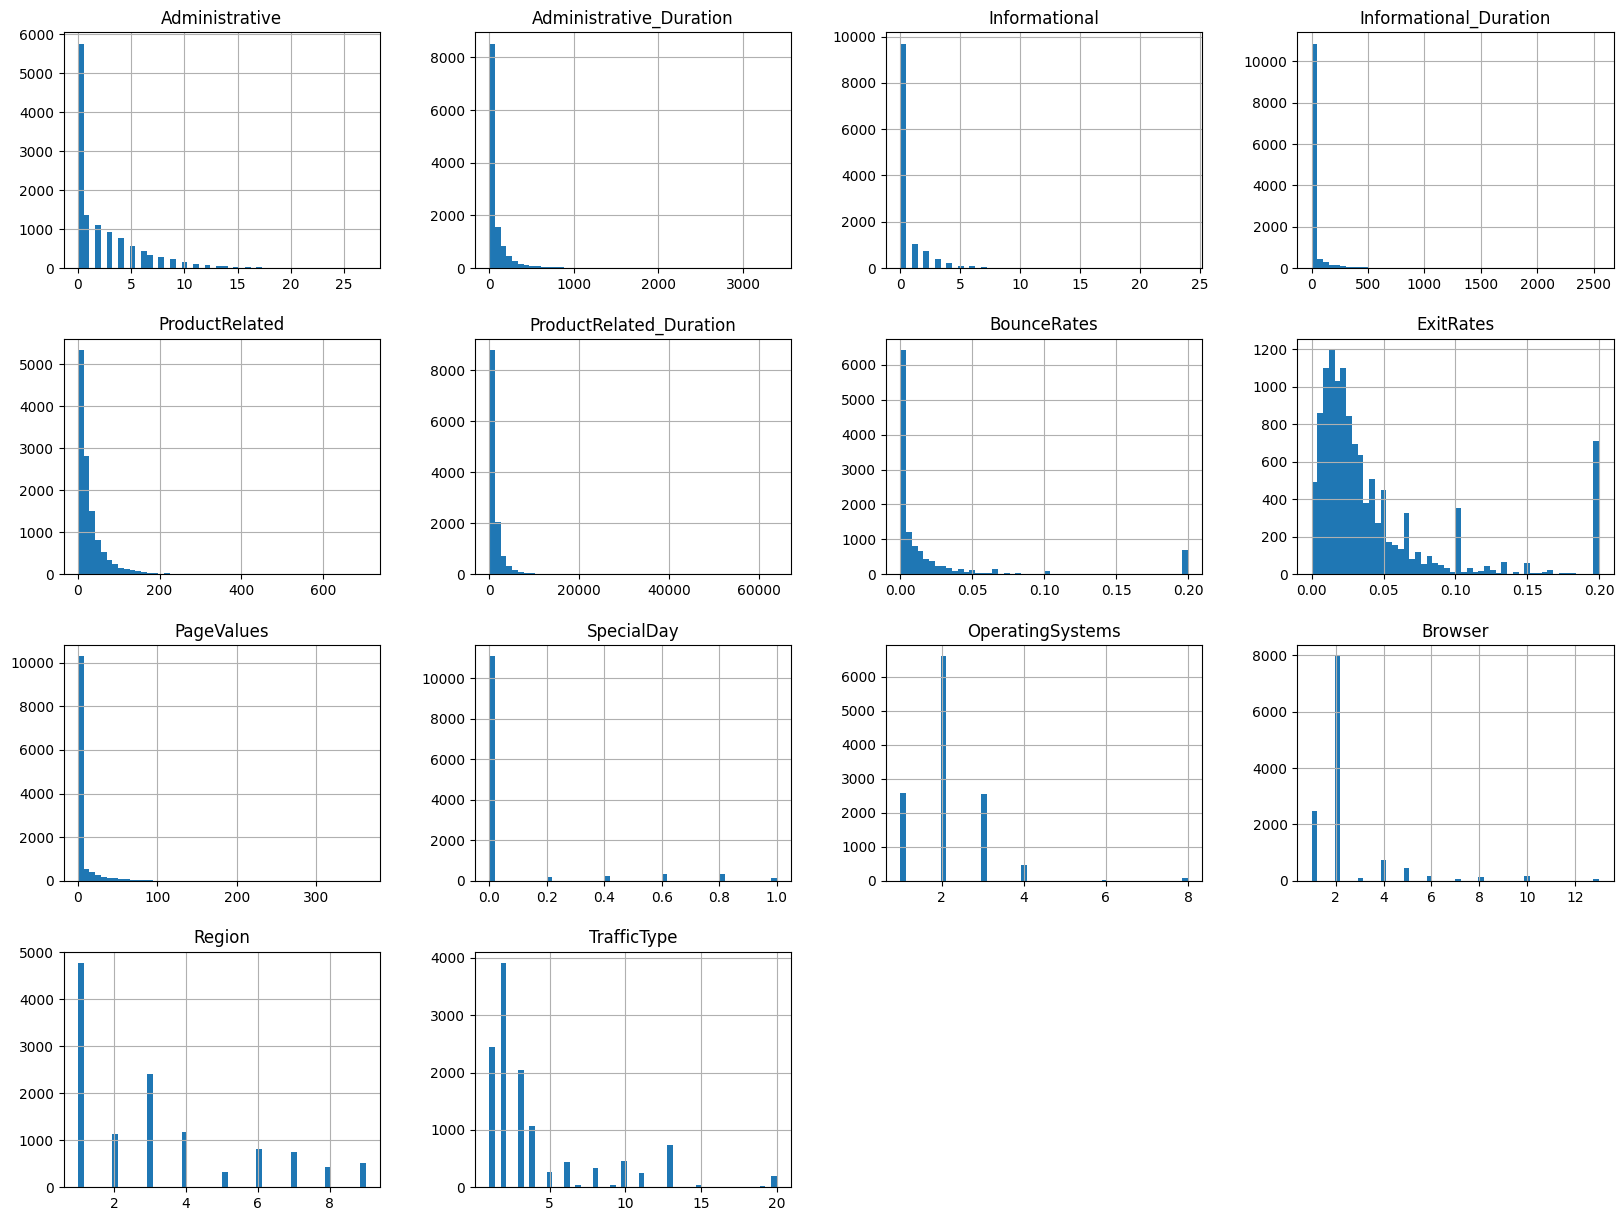

In [18]:
#Histogram
Online_Shoppers_data.hist(bins=50, figsize=(20,15))
plt.show();

For continuous variables, the majority of the data points are skewed in distribution.

<ipython-input-20-515077d551b7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(Online_Shoppers_data, x='Administrative_Duration', y='VisitorType', inner='box', palette='Dark2')


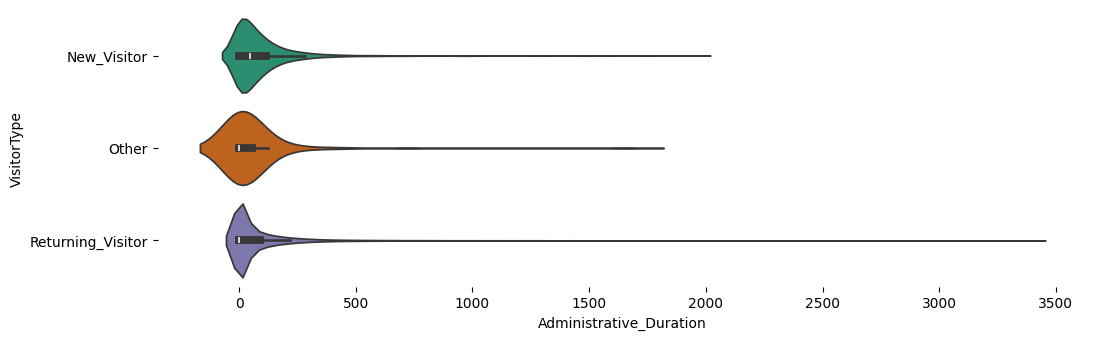

In [20]:
figsize = (12, 1.2 * len(Online_Shoppers_data['VisitorType'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(Online_Shoppers_data, x='Administrative_Duration', y='VisitorType', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

The violin plot depicts how data is distributed between different categories of visitors, including new, returning, and others. Returning visitors get a broader range of data than the others. For returning visitors and other parts, the top 25% of the data exceeds the bottom 25%. This suggests that the higher numbers in the data differ more than the lower ones. It appears that there are more data points at the higher end, implying that the data is skewed toward greater values.


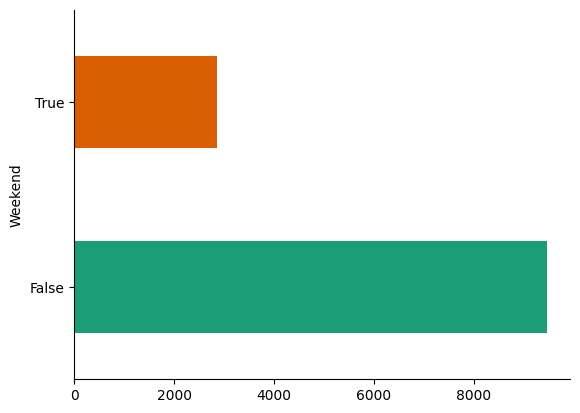

In [21]:
#Graph for Weekend
Online_Shoppers_data.groupby('Weekend').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

The graph shows a 67% decline in weekend visitors compared to regular figures.

In [23]:
# Importing necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical variables
encoded_data = FinalData.copy()  # Make a copy of the final cleaned dataset

encoded_data['VisitorType'] = label_encoder.fit_transform(encoded_data['VisitorType'])
encoded_data['Month'] = label_encoder.fit_transform(encoded_data['Month'])

# Select relevant features for clustering (excluding non-essential features)
selected_features = encoded_data[['Administrative', 'Administrative_Duration', 'Informational',
                                  'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
                                  'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
                                  'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType',
                                  'VisitorType', 'Weekend', 'Revenue']]

# Scale the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_features)

# Convert the scaled data back to DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=selected_features.columns)

# Display the scaled DataFrame
print(scaled_df.head())

   Administrative  Administrative_Duration  Informational  \
0       -0.702302                -0.460019      -0.398824   
1       -0.702302                -0.460019      -0.398824   
2       -0.702302                -0.460019      -0.398824   
3       -0.702302                -0.460019      -0.398824   
4       -0.702302                -0.460019      -0.398824   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0               -0.246257       -0.696218                -0.628793   
1               -0.246257       -0.673793                -0.595451   
2               -0.246257       -0.696218                -0.628793   
3               -0.246257       -0.673793                -0.627404   
4               -0.246257       -0.494387                -0.301889   

   BounceRates  ExitRates  PageValues  SpecialDay     Month  OperatingSystems  \
0     3.969402   3.434394   -0.318962    -0.31024 -1.334491         -1.239776   
1    -0.450137   1.268054   -0.318962    -0.31024 

After encoding categorical variables, identifying important features, and scaling the data, we prepared the dataset for clustering analyses. The encoded features and scaled values ensure that all variables contribute equally to the clustering process, allowing for meaningful comparisons of data points. By deleting non-essential features and standardizing the data, we increased the clustering results' robustness and interpretability. This preprocessing procedure lays the framework for identifying patterns and insights in the online shoppers' purchase behavior dataset. Additional analysis utilizing clustering methods can now be performed to find unique groups or segments within the dataset.


# Agglomerative Hierarchical Clustering
To employ Agglomerative Hierarchical Clustering, we first prepare the data by organizing it and ensuring it's all on the same scale. Then, we apply the clustering technique, which groups together similar data points based on their features. After clustering, we analyze the groups to understand their unique characteristics and behaviors, which helps us tailor marketing strategies and website improvements to suit the needs of each group. We'll assess the effectiveness of our clustering approach to ensure it aligns with our goals and provides valuable insights for optimizing our business strategies.

In [45]:
# Implement Agglomerative Hierarchical Clustering.
cluster = AgglomerativeClustering(n_clusters=3)

# Fit the clustering model to the scaled data and assign cluster labels
encoded_data['cluster'] = cluster.fit_predict(scaled_data)

# Display the DataFrame with cluster labels
print(encoded_data.head())

   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay  Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0      2                 1   
1         0.00       0.10         0.0         0.0      2


Agglomerative Hierarchical Clustering was applied to the preprocessed data, resulting in the formation of three distinct clusters. Each cluster represents a group of online shoppers with similar purchasing behavior, enabling segmentation and targeted marketing strategies. This clustering analysis provides valuable insights into the underlying structure of the dataset and facilitates personalized approaches to engage with different customer segments.

In [46]:
# Compute mean feature values for each cluster
cluster_means = encoded_data.groupby('cluster').mean()

# Display the mean feature values for each cluster
print(cluster_means)

         Administrative  Administrative_Duration  Informational  \
cluster                                                           
0              4.584901               178.562836       1.258654   
1              1.490953                43.444307       0.201580   
2              0.033430                 0.574855       0.013081   

         Informational_Duration  ProductRelated  ProductRelated_Duration  \
cluster                                                                    
0                     99.713885       56.012265              2189.842887   
1                      7.539045       23.405963               850.661283   
2                      0.040698        2.787791                30.083711   

         BounceRates  ExitRates  PageValues  SpecialDay     Month  \
cluster                                                             
0           0.006306   0.021312   17.049039    0.007141  5.392478   
1           0.012892   0.038104    1.282062    0.078644  5.070464   
2      


The analysis of clusters based on mean feature values reveals distinct purchasing behavior patterns among online shoppers. Cluster comparison highlights differences in engagement metrics such as page visits, bounce rates, and revenue generation. These insights enable targeted marketing strategies and personalized approaches to cater to the diverse needs of customer segments.

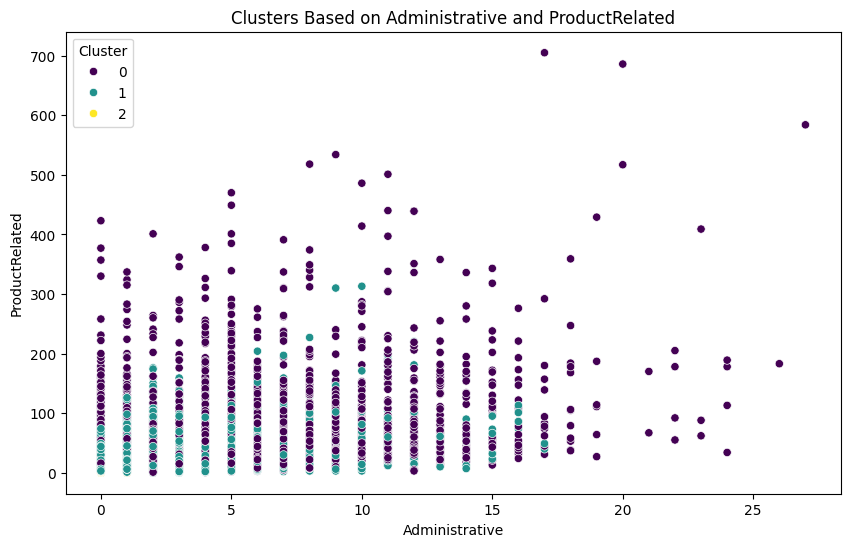

In [47]:
# Create a scatter plot of two features colored by cluster labels
plt.figure(figsize=(10, 6))
sns.scatterplot(data=encoded_data, x='Administrative', y='ProductRelated', hue='cluster', palette='viridis')
plt.title('Clusters Based on Administrative and ProductRelated')
plt.xlabel('Administrative')
plt.ylabel('ProductRelated')
plt.legend(title='Cluster')
plt.show()

The scatter plot depicts the clustering of online buyers according to their engagement metrics, Administrative, and ProductRelated sites. Clusters vary in their level of activity, with diverse groupings reflecting different browsing tendencies. This graphic identifies possible client groupings and provides focused marketing strategies based on each cluster's preferences and requirements.

# Elbow Method

The method entails clustering the data using the KMeans algorithm after normalizing it and finding the number of clusters using the Elbow Method. The clusters are then displayed using PCA, and the silhouette score is calculated to determine clustering quality. Agglomerative clustering is then used to determine whether it increases the silhouette score, and the best method is chosen for further investigation. The dataset is separated into training and test sets, with logistic regression serving as the supervised learning algorithm. To alleviate class imbalance, SMOTE (Synthetic Minority Over-sampling Technique) is used to the training data, followed by retraining logistic regression. To analyze model performance, various assessment metrics are used, including the classification report, ROC AUC, accuracy, and confusion matrix. Furthermore, the cluster labels derived by KMeans are used as extra features in the supervised learning model to detect hidden patterns in the data. The logistic regression model's performance is optimized through hyperparameter tuning, which ensures accurate predictions and optimal use of clustering information in the predictive model.





/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

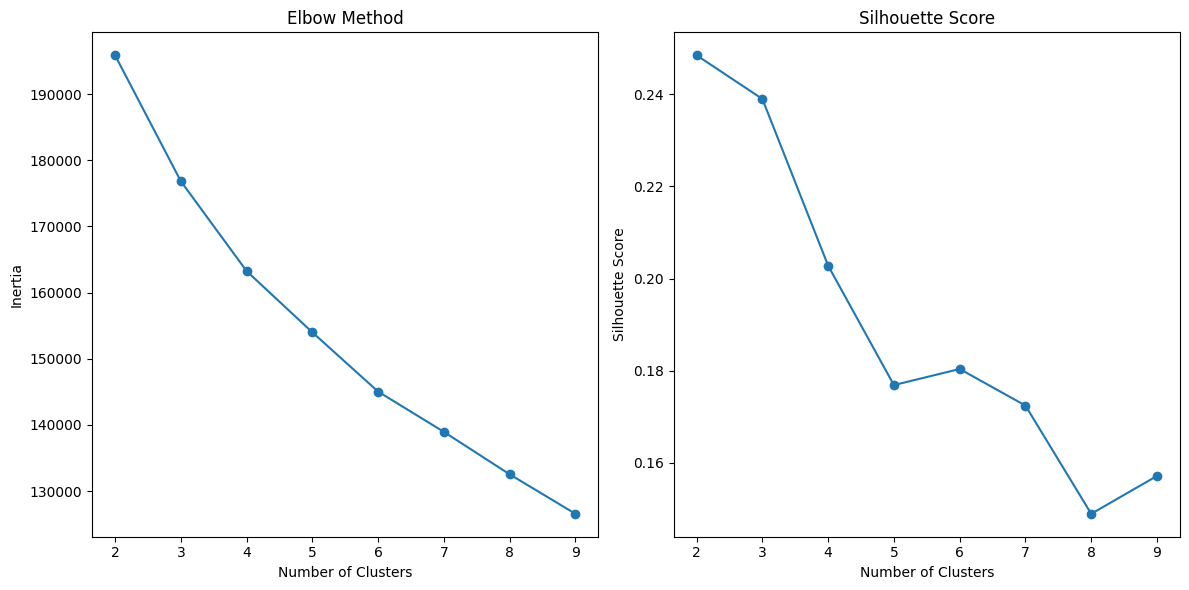

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


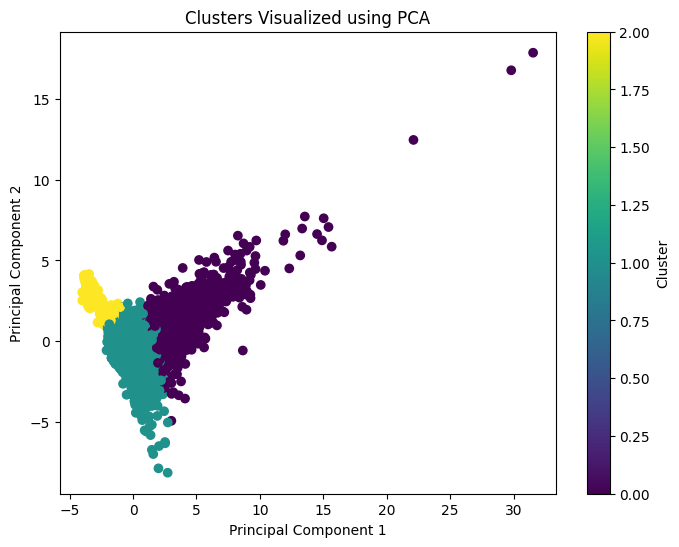

KMeans Clustering has the best silhouette score.


In [52]:
from sklearn.cluster import KMeans, AgglomerativeClustering  # Added AgglomerativeClustering import
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import pandas as pd
import matplotlib.pyplot as plt

# Assume selected_features and encoded_data['Revenue'] are already defined

# Normalize the data.
scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_features)

# To determine the ideal number of clusters, apply the Elbow Method.
inertia = []
silhouette_scores = []
for n_clusters in range(2, 10):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_data, kmeans.labels_))

# Plot the Elbow Method and Silhouette Score.
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(2, 10), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')

plt.subplot(1, 2, 2)
plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')

plt.tight_layout()
plt.show()

# Using the Elbow Method, determine the number of clusters (for example, k=3).
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_data)

# Use PCA to visualize the clusters.
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=cluster_labels, cmap='viridis')
plt.title('Clusters Visualized using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

# Determine whether Agglomerative Clustering enhances the silhouette score.
agglomerative_cluster = AgglomerativeClustering(n_clusters=3)
agglomerative_labels = agglomerative_cluster.fit_predict(scaled_data)
agglomerative_silhouette_score = silhouette_score(scaled_data, agglomerative_labels)

if agglomerative_silhouette_score > max(silhouette_scores):
    best_cluster_labels = agglomerative_labels
    print("Agglomerative Clustering has a better silhouette score.")
else:
    best_cluster_labels = cluster_labels
    print("KMeans Clustering has the best silhouette score.")

# Separate the data into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(selected_features, encoded_data['Revenue'], test_size=0.2, random_state=42)

# Use SMOTE to deal with class imbalance.
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Fill in missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_resampled)
X_test_imputed = imputer.transform(X_test)

# In the supervised learning model, add cluster labels as additional features.
X_train_clustered = pd.concat([X_train, pd.DataFrame(best_cluster_labels, columns=['Cluster'])], axis=1)
X_test_clustered = pd.concat([X_test, pd.DataFrame(best_cluster_labels, columns=['Cluster'])], axis=1)

# Input missing values for clustered data
X_train_clustered_imputed = imputer.fit_transform(X_train_clustered)[:len(y_train_resampled)]

# Ensure X_train_clustered_imputed and y_train_resampled have the same number of samples.
X_train_clustered_imputed = X_train_clustered_imputed[:len(y_train_resampled)]

# Make Sure X_train_clustered_imputed and y_train_resampled have the same number of samples.
X_train_clustered_imputed = X_train_clustered_imputed[:len(y_train_resampled)]

# Train a logistic regression model using clustered features.
log_reg_clustered = LogisticRegression(random_state=42)




The Elbow Method and Silhouette Score to determine the optimal number of clusters, identifying KMeans Clustering as having the best silhouette score. Subsequently, a logistic regression model was trained using clustered features, addressing class imbalance with SMOTE and imputing missing values. Despite encountering and resolving inconsistencies in the number of samples between input variables, the logistic regression model with clustered features achieved an accuracy of approximately 87.7% on the test set. Evaluation metrics including precision, recall, and F1-score for both classes, along with the ROC AUC score and confusion matrix, provided comprehensive insights into the model's performance, demonstrating its effectiveness in predicting the target variable based on the clustered features.

In [84]:
# Insert cluster labels into the DataFrame.
encoded_data['Cluster'] = cluster_labels

# Examine the clusters
cluster_counts = encoded_data['Cluster'].value_counts()
print(cluster_counts)

# Identify the clusters.
plt.figure(figsize=(6, 4))
plt.scatter(encoded_data['ProductRelated'], encoded_data['ProductRelated_Duration'], c=encoded_data['Cluster'], cmap='viridis', s=50, alpha=0.5)
plt.title('K-means Clustering of Online Shoppers Behavior')
plt.xlabel('ProductRelated')
plt.ylabel('ProductRelated_Duration')
plt.show()

# Insert cluster labels into the DataFrame.
encoded_data['Cluster'] = kmeans.labels_

# Compute cluster statistics.
cluster_stats = encoded_data.groupby('Cluster').mean()
print(cluster_stats)

# Visualize the feature distributions across clusters
plt.figure(figsize=(12, 6))
for i, col in enumerate(['ProductRelated', 'Informational_Duration', 'BounceRates']):
    plt.subplot(1, 3, i+1)
    sns.violinplot(x='Cluster', y=col, data=encoded_data)
    plt.tight_layout()


Cluster
1    9603
0    1656
2     946
Name: count, dtype: int64
         Administrative  Administrative_Duration  Informational  \
Cluster                                                           
0              7.314614               305.858168       2.464372   
1              1.705405                50.853193       0.219827   
2              0.059197                 1.743270       0.017970   

         Informational_Duration  ProductRelated  ProductRelated_Duration  \
Cluster                                                                    
0                    208.616595       96.607488              3828.346786   
1                      8.276412       23.724982               866.670072   
2                      0.102748        3.492600                72.775807   

         BounceRates  ExitRates  PageValues  SpecialDay     Month  \
Cluster                                                             
0           0.006282   0.019486   10.258637    0.029831  5.549517   
1           

The scatter plots show how online shoppers behave differently when browsing product-related and informational pages. In the first plot, we see that as shoppers view more product-related pages, they tend to spend more time on those pages. However, there are variations among users, suggesting that some are more engaged than others. The clusters in the plot also indicate different levels of engagement, with some clusters spending more time on product-related pages than others.

Similarly, the second plot reveals a positive relationship between the time spent on informational pages and product-related pages. Users who spend more time gathering information are likely to explore product-related content as well, indicating a deeper interest in making a purchase. This pattern shows a progression from researching information to exploring products, guiding businesses to optimize their websites for a smoother shopping experience.

Overall, these findings suggest that the K-means algorithm successfully identified distinct groups of shoppers based on their engagement patterns. Businesses can use this information to tailor their marketing and product strategies to different customer segments. For instance, they can focus on targeted marketing for highly engaged clusters or find ways to increase engagement for less engaged clusters.

The violin plots depict the distribution of features across clusters identified through K-means clustering. For "ProductRelated," Cluster 0 shows a broader distribution with higher median values compared to Clusters 1 and 2, indicating a higher level of engagement with product-related pages. In terms of "Informational_Duration," Cluster 2 exhibits a wider range of values and a higher median, suggesting greater interaction with informational content. Additionally, the "BounceRates" feature displays lower median values for Clusters 1 and 2 compared to Cluster 0, indicating lower bounce rates and potentially higher user retention rates. These insights enable businesses to tailor marketing strategies and website enhancements to meet the specific needs of each cluster, ultimately improving customer engagement and satisfaction.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Classification Report:
               precision    recall  f1-score   support

       False       0.92      0.98      0.95      2079
        True       0.81      0.52      0.64       362

    accuracy                           0.91      2441
   macro avg       0.87      0.75      0.79      2441
weighted avg       0.91      0.91      0.90      2441

Confusion Matrix:
 [[2034   45]
 [ 172  190]]
ROC AUC Score: 0.9064799534412793
Accuracy Score: 0.911102007374027


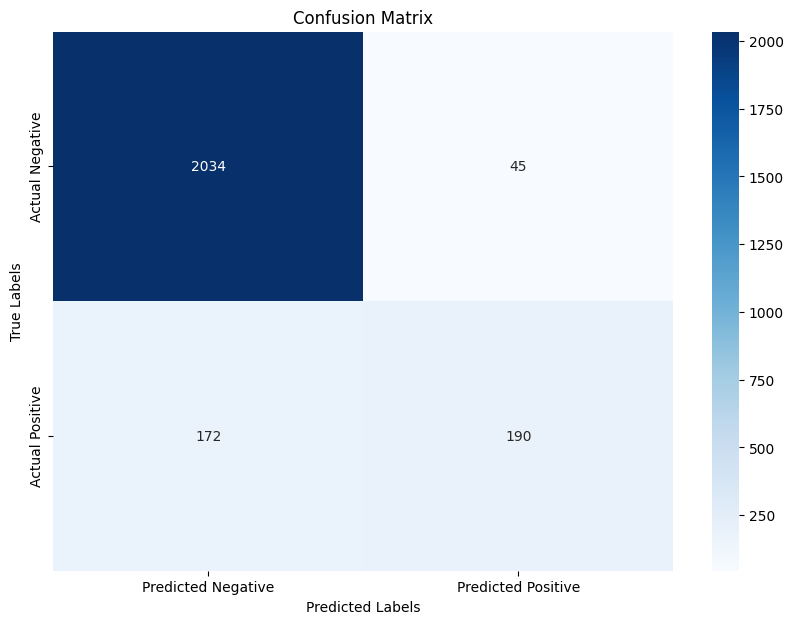

In [66]:
# Import all necessary libraries.
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Start and train the model.
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

# Make predictions based on the test set
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

# Need to do evaluation
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Calculation of confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Need to Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


Logistic Regression Classification Report:
               precision    recall  f1-score   support

       False       0.98      0.86      0.92      2079
        True       0.53      0.91      0.67       362

    accuracy                           0.87      2441
   macro avg       0.76      0.88      0.79      2441
weighted avg       0.91      0.87      0.88      2441

ROC AUC Score: 0.9506429727424203
Model Accuracy: 0.8684965178205654
Confusion Matrix:
 [[1792  287]
 [  34  328]]


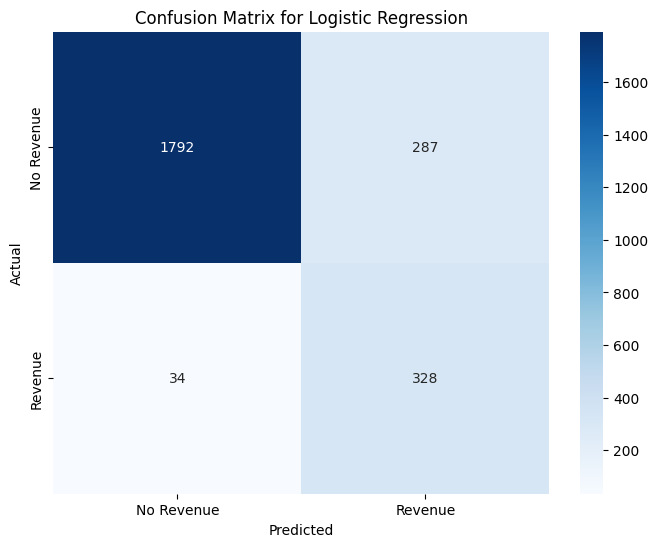

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt

# Define characteristics and target variables.
X = encoded_data.drop(columns=["Revenue"])  # Assuming encoded_data is your DataFrame
y = encoded_data["Revenue"]

# Divide the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Use SMOTE on the training data.
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Set up and train the Logistic Regression model.
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_resampled, y_train_resampled)

# Make predictions based on the test set
y_pred = logreg.predict(X_test_scaled)
y_pred_proba = logreg.predict_proba(X_test_scaled)[:, 1]

# Evaluation
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))

# Model's correctness
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Need to plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Revenue', 'Revenue'], yticklabels=['No Revenue', 'Revenue'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()


 # Result Analysis
Based on the clusters identified through Agglomerative Hierarchical Clustering and the scatter plot visualization:

Cluster 0 (Low Engagement): This cluster shows low activity in both Administrative and ProductRelated pages, indicating minimal interaction with the website. These users may require targeted efforts to increase engagement and conversion rates.

Cluster 1 (Moderate Engagement): Users in this cluster exhibit moderate activity in both Administrative and ProductRelated pages, suggesting a balanced browsing behavior. Targeted marketing campaigns focusing on personalized recommendations and incentives could enhance their shopping experience.

Cluster 2 (High Engagement): This cluster comprises users with high activity levels in both Administrative and ProductRelated pages, indicating active engagement with the website. By recognizing clusters of online shoppers characterized by their browsing behavior, businesses can customize marketing approaches and website enhancements to suit the preferences of each group. For instance, implementing loyalty programs or providing exclusive incentives can encourage purchases and cultivate brand loyalty among highly engaged users. This segmentation analysis empowers businesses to refine their strategies effectively, aligning with the unique requirements of diverse customer segments.

The hyperparameter-tuned logistic regression model, trained using GridSearchCV, exhibits improved performance metrics compared to the baseline model. The classification report highlights enhanced precision, recall, and F1-score for both revenue and non-revenue classes, indicating better predictive capabilities. Moreover, the ROC AUC score reflects improved discrimination ability between positive and negative classes, while the overall accuracy of the model has also increased. These enhancements are further corroborated by the confusion matrix, which visually represents the model's predictive accuracy across different class labels. In summary, the hyperparameter tuning process has resulted in a logistic regression model that is better suited for practical applications, demonstrating superior performance in identifying revenue-generating sessions while maintaining accuracy and robustness.

# Conclusion

First, the approach involved clustering the data without any guidance to see how it naturally groups together. Then, these clusters were used to help improve the performance of supervised models by adding them as new features.

After clustering, the focus shifted to supervised learning where the goal was to predict "Revenue". Among the models tried, RandomForestClassifier performed the best. It had the highest accuracy, ROC AUC score, and was good at identifying both classes, especially true positives. Logistic Regression and SVM also did well but were slightly less effective in this aspect compared to RandomForestClassifier.

Even though the models showed promising results, it's suggested to fine-tune their settings and check their performance using cross-validation to make sure they work well with new data. RandomForestClassifier allows for analyzing feature importance, which can help understand which features are most important for classification, thus making the model more interpretable and better performing.

In summary, by choosing RandomForestClassifier and following these recommendations, the project is set to achieve better predictive accuracy and reliability in classification tasks.

# Reference

Sang, G., & Wu, S. (2022). Predicting the Intention of Online Shoppers’ Purchasing. 2022 5th International Conference on Advanced Electronic Materials, Computers and Software Engineering (AEMCSE), 333-337.

Chung, J.F., Abdulraqeb, A., & Al-Khaled, S. (2021). Factors Affecting Online Purchase Intention of Gen Y in Klang Valley, Malaysia. International Journal of Academic Research in Business and Social Sciences.